In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
#Downloading the dataset from Kaggle
!kaggle datasets download -d paultimothymooney/kermany2018

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/kermany2018
License(s): CC-BY-NC-SA-4.0
100% 10.8G/10.8G [02:00<00:00, 191MB/s]
100% 10.8G/10.8G [02:00<00:00, 96.7MB/s]


In [ ]:
#Extracting the contents of the compressed file
!unzip /content/kermany2018.zip

Streaming output truncated to the last 5000 lines.
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8050636-2.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055145-1.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055145-2.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055145-3.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055590-1.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055590-2.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055590-3.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-1.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-2.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-3.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-4.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-5.jpeg  
  inflating: 

In [ ]:
  #Importing the libraries
  import tensorflow as tf
  from tensorflow import keras
  from keras import Sequential
  from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [ ]:
  # Generators
  train_ds = keras.utils.image_dataset_from_directory(
      directory = '/content/OCT2017 /train',
      labels='inferred',
      label_mode = 'int',
      batch_size=32,
      image_size=(256,256)
  )

  validation_ds = keras.utils.image_dataset_from_directory(
      directory = '/content/OCT2017 /test',
      labels='inferred',
      label_mode = 'int',
      batch_size=32,
      image_size=(256,256)
  )

Found 83484 files belonging to 4 classes.
Found 968 files belonging to 4 classes.


In [ ]:
# Normalizing the images
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
  # Defining the model architecture

  def model():

      model = Sequential()
      model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
      model.add(MaxPooling2D((2, 2)))
      model.add(Conv2D(64, (3, 3), activation='relu'))
      model.add(MaxPooling2D((2, 2)))
      model.add(Conv2D(128, (3, 3), activation='relu'))
      model.add(MaxPooling2D((2, 2)))
      model.add(Conv2D(128, (3, 3), activation='relu'))
      model.add(MaxPooling2D((2, 2)))
      model.add(Flatten())
      model.add(Dropout(0.5))
      model.add(Dense(4, activation='softmax'))


  # Compiling model
      model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

      return model

In [ ]:
model = model() #assigning the model function to the variable named model
model.summary() #shows the details of each layer in detail

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 30, 30, 128)      

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Defining model checkpoint callback to save weights of the models that are performing best

from keras.callbacks import ModelCheckpoint

path = "/content/drive/MyDrive/weights_improvement_mode1-{epoch:02d}-{val_accuracy: .2f}.hdf5"

model_checkpoint = tf.keras.callbacks.ModelCheckpoint( filepath= path, save_weights_only=True, monitor='val_accuracy', verbose=1, mode='max',
                                                      save_best_only=True)

# Training the model

History = model.fit(train_ds,epochs=25, validation_data=validation_ds, callbacks=[model_checkpoint])


Epoch 1/25
2609/2609 [==============================] - ETA: 0s - loss: 0.5357 - accuracy: 0.8044
Epoch 1: val_accuracy improved from -inf to 0.84917, saving model to /content/drive/MyDrive/weights_improvement_mode1-01- 0.85.hdf5
2609/2609 [==============================] - 319s 119ms/step - loss: 0.5357 - accuracy: 0.8044 - val_loss: 0.3918 - val_accuracy: 0.8492
Epoch 2/25
2609/2609 [==============================] - ETA: 0s - loss: 0.2700 - accuracy: 0.9082
Epoch 2: val_accuracy improved from 0.84917 to 0.96384, saving model to /content/drive/MyDrive/weights_improvement_mode1-02- 0.96.hdf5
2609/2609 [==============================] - 300s 115ms/step - loss: 0.2700 - accuracy: 0.9082 - val_loss: 0.1196 - val_accuracy: 0.9638
Epoch 3/25
2609/2609 [==============================] - ETA: 0s - loss: 0.2055 - accuracy: 0.9314
Epoch 3: val_accuracy improved from 0.96384 to 0.98037, saving model to /content/drive/MyDrive/weights_improvement_mode1-03- 0.98.hdf5
2609/2609 [===================

In [ ]:
#Loading the weights from the best checkpoint
model.load_weights("/content/drive/MyDrive/weights_improvement_mode1-03- 0.98.hdf5")

#Evaluating the model on the test dataset
test_loss, test_acc = model.evaluate(validation_ds, verbose=2)
print('\nTest accuracy:', test_acc)

1/1 - 0s - loss: 123.5191 - accuracy: 0.7500 - 105ms/epoch - 105ms/step

Test accuracy: 0.75


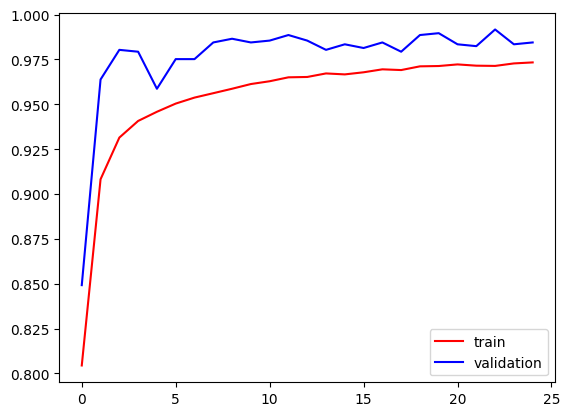

In [ ]:
import matplotlib.pyplot as plt

plt.plot(History.history['accuracy'],color='red',label='train')
plt.plot(History.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
model.save("oct.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
test_model = load_model("/content/oct.h5")
validation_ds = keras.utils.image_dataset_from_directory(
      directory = '/content/oct2017/OCT2017 /val',
      labels='inferred',
      label_mode = 'int',
      batch_size=32,
      image_size=(256,256)
  )

test_model.evaluate(validation_ds)

Found 32 files belonging to 4 classes.
1/1 [==============================] - 0s 271ms/step - loss: 123.5191 - accuracy: 0.7500


[123.51911163330078, 0.75]

In [ ]:
import cv2 as cv
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
#image = "/content/OCT2017 /test/NORMAL/NORMAL-1025847-1.jpeg"
image = "/content/OCT2017 /test/DME/DME-1274315-2.jpeg"
#image = "/content/OCT2017 /test/CNV/CNV-1016042-3.jpeg"
#image = "/content/OCT2017 /test/DRUSEN/DRUSEN-1225603-1.jpeg"

In [ ]:
image=tf.io.read_file(image)
tensor=tf.io.decode_image(image,channels=3,dtype=tf.dtypes.float32)
tensor=tf.image.resize(tensor,[256,256])
input_tensor=tf.expand_dims(tensor,axis=0)

In [ ]:
prediction = np.argmax(test_model.predict(input_tensor))
prediction

1/1 [==============================] - 0s 52ms/step


1

In [ ]:
if prediction==0:
    print("cnv")
elif prediction==1:
    print("dme")
elif prediction==2:
    print("drusen")
elif prediction==3:
    print("normal")
else:
    print("Image is unidentifiable")

dme
